In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'

# FFT and IFFT

In [2]:
# implement 2D-DFT
def dft_2D(x):
    M, N = x.shape
    U, V = x.shape
    X = np.zeros((U, V), dtype=np.complex128)
        
    for u in range(U):
        n = np.arange(N)
        v = np.arange(N).reshape((N, 1))
        # X[u, :] = np.dot(np.exp(-2j * np.pi * v * n / N), x[u, :])
        X[u, :] = np.fft.fft(x[u, :])

    for v in range(V):
        m = np.arange(M)
        u = np.arange(M).reshape((M, 1))
        # X[:, v] = np.dot(np.exp(-2j * np.pi * u * m / M), x[:, v])
        X[:, v] = np.fft.fft(x[:, v])
        
    return X

# implement 2D-IDFT
def idft_2D(X):
    U, V = X.shape
    M, N = X.shape
    x = np.zeros((M, N), dtype=np.complex128)
        
    for m in range(M):
        n = np.arange(N)
        v = np.arange(N).reshape((N, 1))
        # x[m, :] = np.dot(np.exp(2j * np.pi * v * n / N), X[m, :])
        x[m, :] = np.fft.ifft(X[m, :])

    for n in range(N):
        m = np.arange(M)
        u = np.arange(M).reshape((M, 1))
        # x[:, n] = np.dot(np.exp(2j * np.pi * u * m / M), X[:, n])
        x[:, n] = np.fft.ifft(X[:, n])
        
    return x

# Image

[[-250 -249 -248 ...  247  248  249]
 [-250 -249 -248 ...  247  248  249]
 [-250 -249 -248 ...  247  248  249]
 ...
 [-250 -249 -248 ...  247  248  249]
 [-250 -249 -248 ...  247  248  249]
 [-250 -249 -248 ...  247  248  249]]


(512, 512)

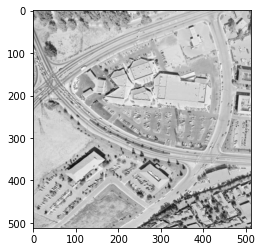

In [3]:
# A 2D sinusoidal img
x = np.arange(-250, 250, 1)
X, Y = np.meshgrid(x, x)
print(X)

# Sinusoidal signal in 2D
wavelength = 200
img = np.sin(2 * np.pi * X / wavelength)

# Image in spatial domain
img = cv2.imread('../images/5.2.09.jpg', 0)
plt.imshow(img, cmap='gray');
plt.imsave('img.png', img, cmap='gray')
img.shape

# 2D-FFT

X_fft shape: (512, 512)
FFT (max, min):  (98343+0j) (-6631.785634686146-868.3221679625932j)


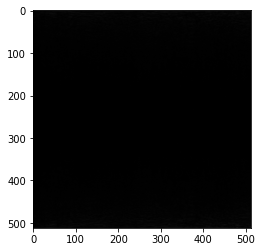

In [4]:
# Image in frequency domain
X_fft = dft_2D(img)

print('X_fft shape:', X_fft.shape)
print('FFT (max, min): ', X_fft.max(), X_fft.min())
plt.imshow(np.abs(X_fft), cmap='gray');
plt.imsave('FFT.png', np.abs(X_fft), cmap='gray')

# 2D-IFFT

(512, 512)


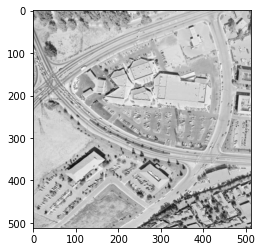

In [6]:
x_ifft = idft_2D(X_fft)

print(x_ifft.shape)
plt.imshow(np.abs(x_ifft), cmap='gray');
plt.imsave('IFFT.png', np.abs(x_ifft), cmap='gray')